In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("sleep_cycle_productivity.csv")
df = pd.DataFrame(data)

df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


## EDA

In [94]:
# removing any duplicate data
df.drop_duplicates(inplace=True)

In [95]:
print("Dataset Information:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score         

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [96]:
# number of unique values for each column
print(df.nunique())

Date                              366
Person_ID                        3858
Age                                42
Gender                              3
Sleep Start Time                  240
Sleep End Time                    817
Total Sleep Hours                 501
Sleep Quality                      10
Exercise (mins/day)                90
Caffeine Intake (mg)              300
Screen Time Before Bed (mins)     180
Work Hours (hrs/day)             5000
Productivity Score                 10
Mood Score                         10
Stress Level                       10
dtype: int64


#  Data Preprocessing

In [97]:
# Convert 'date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert sleep hours from float to HH:MM format
df["Sleep Start Time"] = df["Sleep Start Time"].apply(lambda x: f"{int(x):02}:{int((x % 1) * 60):02}")
df["Sleep End Time"] = df["Sleep End Time"].apply(lambda x: f"{int(x):02}:{int((x % 1) * 60):02}")

# Convert to datetime time format
df["Sleep Start Time"] = pd.to_datetime(df["Sleep Start Time"], format="%H:%M").dt.time
df["Sleep End Time"] = pd.to_datetime(df["Sleep End Time"], format="%H:%M").dt.time

# Check the cleaned values
print(df['Date'].head())
print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())


0   2024-04-12
1   2024-11-04
2   2024-08-31
3   2024-02-22
4   2024-02-23
Name: Date, dtype: datetime64[ns]
0    23:19:00
1    21:01:00
2    22:06:00
3    23:06:00
4    21:25:00
Name: Sleep Start Time, dtype: object
0    04:36:00
1    02:25:00
2    03:27:00
3    06:39:00
4    04:10:00
Name: Sleep End Time, dtype: object


In [98]:
# Create a column for sleep efficiency
df['Sleep Efficiency'] = df['Total Sleep Hours'] * df['Sleep Quality']

# create a column for work productivity
df['Work Productivity'] = df['Work Hours (hrs/day)'] * df['Productivity Score']

# Column for day of the week
df['Day of Week'] = df['Date'].dt.day_name()

## Visualizations

In [99]:
df.columns

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level', 'Sleep Efficiency',
       'Work Productivity', 'Day of Week'],
      dtype='object')

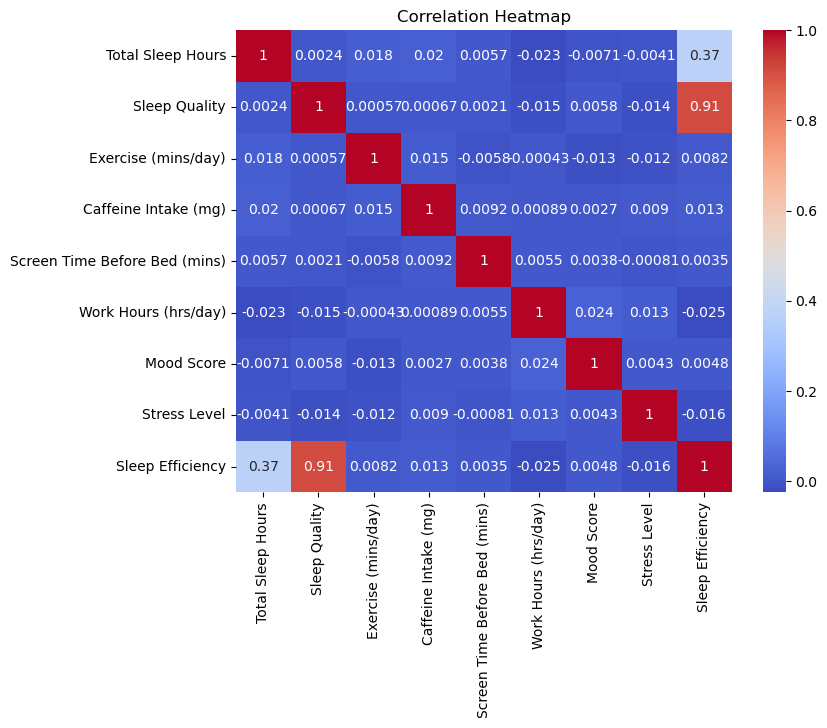

In [100]:
# normalize numerical columns
scaler = StandardScaler()
df_norm = df.copy()
numerical_cols = ['Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
                  'Work Hours (hrs/day)', 'Mood Score', 'Stress Level', 'Sleep Efficiency']
df_norm[numerical_cols] = scaler.fit_transform(df_norm[numerical_cols])

# find numerical columns with highest correlation
corr_matrix = df_norm[numerical_cols].corr()

#  create heat map to find columns with highest correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Steps')

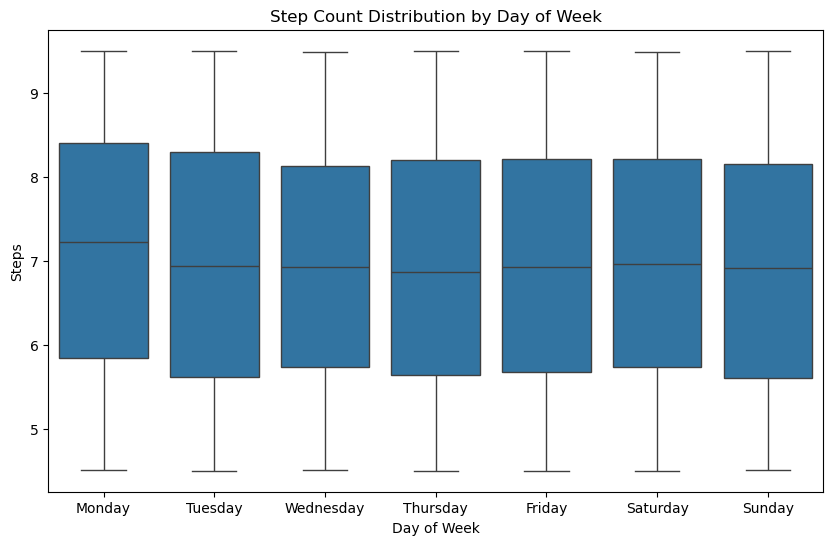

In [53]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='Day_of_Week', y='Total Sleep Hours', order=order)
plt.title('Step Count Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Steps')

In [91]:
# Group by Person_ID and calculate min and max sleep hours
sleep_stats = df.groupby('Person_ID')['Sleep Efficiency'].agg(['min', 'max']).reset_index()
sleep_stats = sleep_stats.merge(df[['Person_ID', 'Mood Score']], on='Person_ID', how='left').drop_duplicates()

# # Create an interactive scatter plot for each Sleep Quality rating
# chart = alt.Chart(sleep_stats).mark_circle().encode(
#     x=alt.X('min:Q', title='Minimum Sleep Hours'),
#     y=alt.Y('max:Q', title='Maximum Sleep Hours'),
#     color=alt.Color('Mood Score:N', legend=alt.Legend(title="Mood Score")),
#     tooltip=['Person_ID', 'min', 'max', 'Mood Score']
# ).facet(
#     facet='Mood Score:N',
#     columns=5  # This ensures the facets are split into multiple rows
# ).properties(
#     title="Min and Max Sleep Hours per User, Split by Sleep Quality"
# ).interactive()

# chart

In [102]:
sleep_stats

,Person_ID,min,max,Mood Score
0,1000,24.12,47.20,10
1,1000,24.12,47.20,2
2,1001,85.40,85.40,6
3,1003,34.20,53.76,3
5,1006,24.92,24.92,1
...,...,...,...,...
4993,9988,14.34,14.34,9
4994,9989,6.90,51.40,6
4995,9989,6.90,51.40,8
4998,9997,71.01,71.01,8


In [105]:
# Create bins for caffeine intake
bins = [0, 100, 200, 300]  # Define bin ranges
labels = ['Low', 'Medium', 'High']
df['Caffeine_Bin'] = pd.cut(df['Caffeine Intake (mg)'], bins=bins, labels=labels, include_lowest=True)

# Get min and max sleep per user
sleep_stats = df.groupby("Person_ID")["Total Sleep Hours"].agg(["min", "max"]).reset_index()

# Merge caffeine intake bins back to user-level data
sleep_stats = sleep_stats.merge(df[['Person_ID', 'Caffeine_Bin']].drop_duplicates(), on="Person_ID")

# Function to create a chart for a specific caffeine bin
def create_chart(caffeine_bin):
    return alt.Chart(sleep_stats[sleep_stats["Caffeine_Bin"] == caffeine_bin]).mark_circle().encode(
        x=alt.X('min:Q', title='Min Sleep Hours'),
        y=alt.Y('max:Q', title='Max Sleep Hours'),
        tooltip=['Person_ID', 'min', 'max', 'Caffeine_Bin']
    ).properties(
        title=f"Min vs. Max Sleep Hours ({caffeine_bin} Caffeine Intake)",
        width=300,
        height=300
    ).interactive()

# Create charts for each caffeine intake category
low_chart = create_chart("Low")
medium_chart = create_chart("Medium")
high_chart = create_chart("High")

# Combine all charts in a vertical layout
final_chart = alt.vconcat(low_chart, medium_chart, high_chart)

# Display the final chart
final_chart

alt.VConcatChart(...)

In [89]:
# Group by Person_ID and calculate min and max sleep hours
sleep_stats = df.groupby('Person_ID')['Total Sleep Hours'].agg(['min', 'max']).reset_index()

# Merge Sleep Quality & Caffeine Intake
sleep_stats = sleep_stats.merge(df[['Person_ID', 'Sleep Quality', 'Caffeine Intake (mg)']], on='Person_ID', how='left').drop_duplicates()

# Define refined caffeine intake bins
bins = [0, 1, 75, 150, 225, 300]
labels = ["None (0 mg)", "Low (1-75 mg)", "Moderate (76-150 mg)", "High (151-225 mg)", "Very High (226-300 mg)"]

# Bin the caffeine intake
sleep_stats['Caffeine Bin'] = pd.cut(sleep_stats['Caffeine Intake (mg)'], bins=bins, labels=labels, include_lowest=True)

# Create an interactive scatter plot, faceted by Caffeine Bin
chart = alt.Chart(sleep_stats).mark_circle(size=60).encode(
    x=alt.X('min:Q', title='Minimum Sleep Hours'),
    y=alt.Y('max:Q', title='Maximum Sleep Hours'),
    color=alt.Color('Sleep Quality:N', legend=alt.Legend(title="Sleep Quality")),
    tooltip=['Person_ID', 'min', 'max', 'Sleep Quality', 'Caffeine Bin']
).facet(
    facet='Caffeine Bin:N',
    columns=2  # Adjusts layout to 2 rows
).properties(
    title="Min and Max Sleep Hours per User, Split by Caffeine Intake",
).interactive()

chart

alt.FacetChart(...)